1.	What is Tensorflow ? And how is Keras different from it?

TensorFlow is an open-source Machine Learning library meant for analytical computing. It is a cross-platform tool. It can run on both the Graphical Processing Unit (GPU) and the Central Processing Unit (CPU), including TPUs and embedded platforms. What are TPUs? Let us understand them, before jumping into the features of TensorFlow.

Tensor Processing Units (TPUs) that were developed by Google are used to run Machine Learning workloads. They are designed to accelerate flexibility and performance that help developers and researchers create TensorFlow clusters that make use of TPUs and GPUs.

Here are some of the features of TensorFlow:

   * Supports model building: It offers various levels of concepts to train and build models.
   * Effective research: TensorFlow allows us to control model subclassing API and Keras functional API to create tough topologies.
   * Robust and platform-independent: It helps deploy our applications very easily, irrespective of the language or platform we use.

Keras is one of the well-known APIs that is open-source, with a neural network library written in Python. It can run on the leading Deep Learning tool kits such as Microsoft Cognitive, TensorFlow, and Theano. It allows for faster analysis with deep neural networks.

Some of the important features of Keras:
  * User friendly: It is easy to understand since it is a completely Python-based framework and has a high-level interface.
  * Modular in nature: It is suitable for inventive research that is flexible and expressive. It also relays on both CPU and GPU.
  *Supports arbitrary networks: It supports model sharing, multiple input-output models, layer sharing, and many more.

The differences between tensorflow and keras are
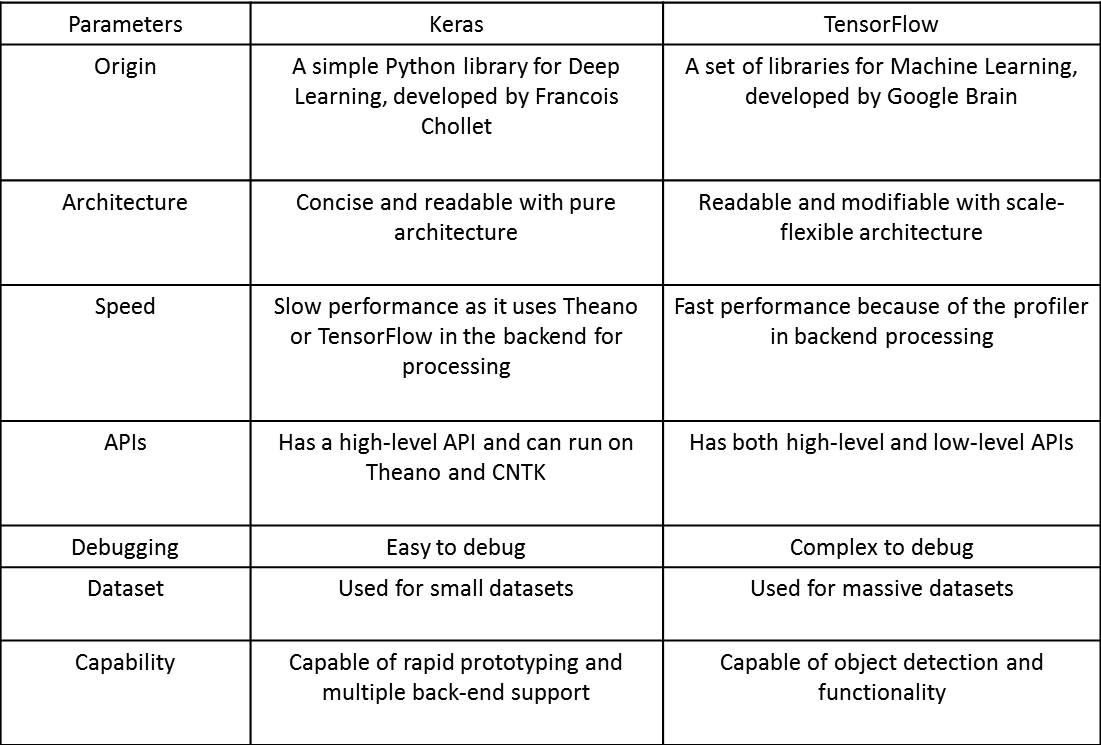 

2.	What are different types of models in Keras?  Explain the working of Sequential modeling. 

 Keras model represents the actual neural network model. 
 Keras provides a two mode to create the model
      1. Sequential Model
      2. Functional Model

Working of Sequential Model

It is simple and easy to use model. It is a linear stack of methods that groups a linear stack of layers into a tf.keras.Model. According to its name, its main task is to arrange the layers of the Keras in sequential order.

  In this model, the data flow from one layer to another layer. The flow of data is continued until the data reaches the final layer. Most of the ANN’s use the Sequential API Model.

1. Prepare Data
        a. Understand the problem
        b. Formulate the problem
        c. Ask relevant questions (about process & data)
        d. Modify the raw data
        e. Filtering the data for training and testing.

2. Start Modelling
        a. Create input layer with flattening
        b. Create hidden layer/layers (Use sigmoid, relu, tanh as activation functions)
        c. create output layer with softmax activation functions

3. Iteration of hyper parameter (in order to reduce error & losses)
4. Test the model
5. validation of model
6. Ship the model to production (like MLOps, API)

3.	Explain the losses in Deep Learning and how are they responsible for model learning?



loss function is directly related to the activation function used in the output layer of your neural network. 
These two design elements are connected.
At its core, a loss function is a measure of how good your prediction model does in terms of being able to predict the expected outcome(or value)
We convert the learning problem into an optimization problem, define a loss function and then optimize the algorithm to minimize the loss function.

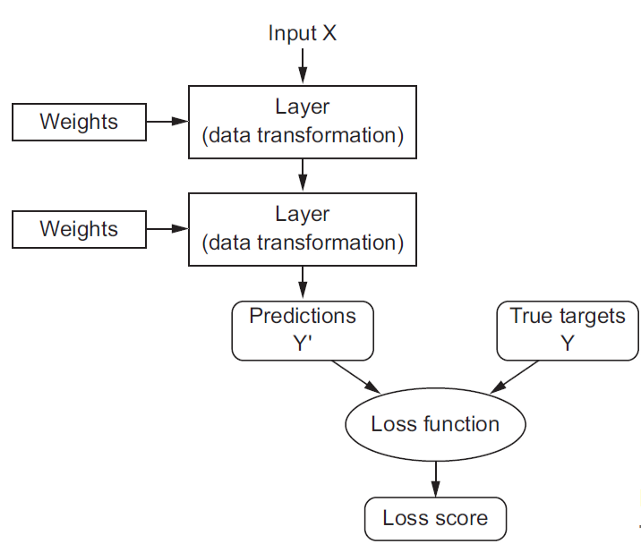


Most commonly used loss functions are
    * Mean Squared error
    * Mean Absolute Error
    * Log-Likelihood Loss
    * Hinge Loss
    * Huber Loss

a. Regression Problem

A problem where you predict a real-value quantity.
  * Output Layer Configuration: One node with a linear activation unit
  * Loss Function: Mean Squared Error (MSE).

B. Binary Classification Problem

A problem where you classify an example as belonging to one of two classes.
The problem is framed as predicting the likelihood of an example belonging to class one, e.g. the class that you assign the integer value 1, whereas the other class is assigned the value 0.

    * Output Layer Configuration: One node with a sigmoid activation unit
    * Loss Function: Cross-Entropy, also referred to as Logarithmic loss.

c. Multi-Class Classification Problem
  
  A problem where you classify an example as belonging to one of more than two classes. The problem is framed as predicting the likelihood of an example belonging to each class.

    * Output Layer Configuration: One node for each class using the softmax activation function.
    * Loss Function: Cross-Entropy, also referred to as Logarithmic loss.

4.	MNIST has been the toy dataset for Deep Learning, but today you will need to design a Neural Network for the Fashion MNIST dataset (can be sourced from keras.datasets.fashion_mnist). 

    a.	How many hidden layers are required for this dataset? 

    b.	How many neurons per layer work best for the model, explain and generate insights across it.


11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28)


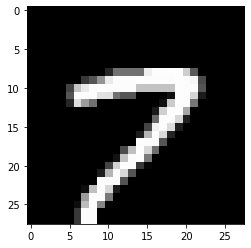

7
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 10)                5010      
                                                                 
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1688/1688 [==============================] - 10s 5ms/step - loss: 0.6398 - acc: 0.8432 - val_loss: 0.3116 - val_acc: 0.9205
Epoch 2/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3381 - acc: 0.9066 - val_loss: 0.2511 - val_acc: 0.9318
Epoch 3/10
1688/1688 [=====================

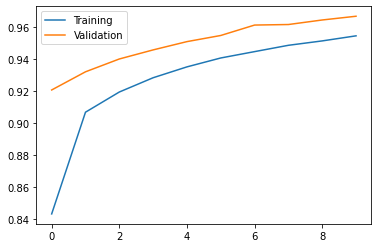

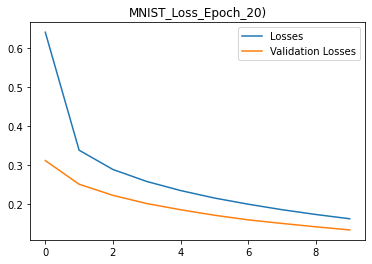

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
print(x_train.shape,y_train.shape)
print(x_test.shape),(y_test.shape)
plt.imshow(x_train[0,:,:])
plt.imshow(x_train[0,:,:],cmap="gray")

num=123
plt.imshow(x_train[123,:,:],cmap='gray')
plt.show()
print(y_train[num])

#1. Data Processing
x_train=x_train/255.0
y_train=tf.keras.utils.to_categorical(y_train)

#2. Sequential model
model=tf.keras.models.Sequential()

#3. Input layers
model.add(tf.keras.layers.Input(shape=(28,28)),)
model.add(tf.keras.layers.Flatten())

#4. HiddenLayers
model.add(tf.keras.layers.Dense(units=500,activation=tf.keras.activations.relu))

#5. Output Layers
model.add(tf.keras.layers.Dense(units=10,activation=tf.keras.activations.softmax))
model.summary()

#6. Feed Forward (Error + Back Propogation)
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),metrics=["acc"])

#7. Run the model
model_history=model.fit(x_train,y_train,epochs=10,validation_split=0.1)

 #8. Visualization
plt.plot(model_history.history.get("acc"),label="Training")
plt.plot(model_history.history.get("val_acc"),label="Validation")
plt.legend()
plt.show()
plt.plot(model_history.history.get("loss"),label="Losses")
plt.plot(model_history.history.get("val_loss"),label="Validation Losses")
plt.legend()
plt.title("MNIST_Loss_Epoch_20)")
plt.show()

#9. Final Weights
len(model.get_weights())
for i in model.get_weights():
  print(f"{i.shape}")

#10 Test Image
test_image=x_test[1]
plt.imshow(test_image,cmap='gray')
test_image=test_image/255.0
print(model.input.shape, test_image.shape)



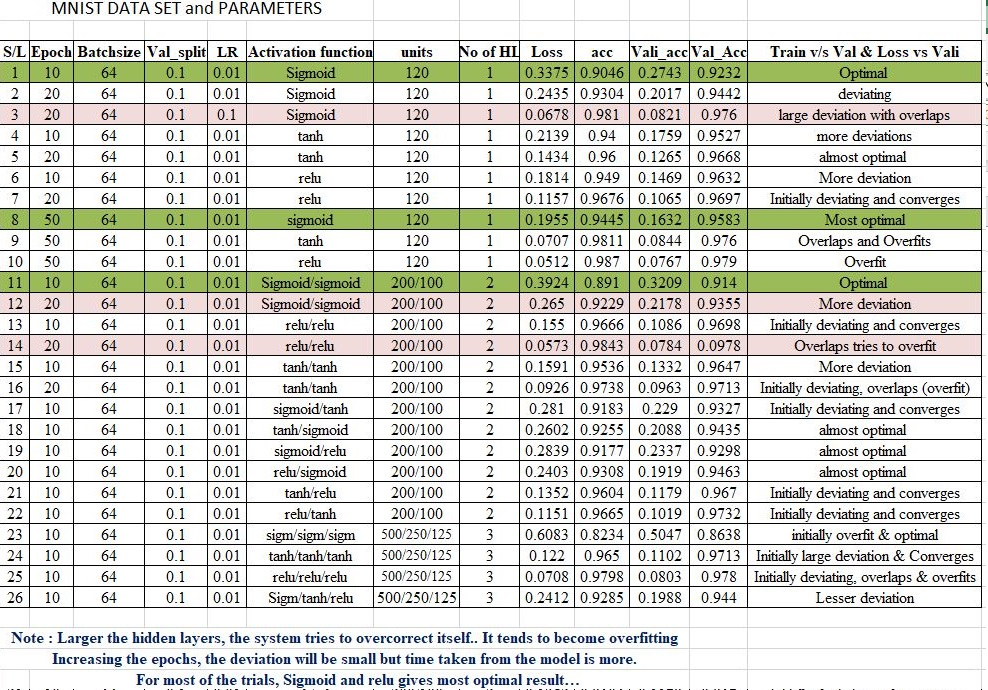

5.	Explain your understanding of overfitting and underfitting in detail. How do you identify and measure overfitting? 


Underfitting: 

A statistical model or a machine learning algorithm is said to have underfitting when it cannot capture the underlying trend of the data.  Underfitting destroys the accuracy of our machine learning model. Its occurrence simply means that our model or the algorithm does not fit the data well enough. It usually happens when we have fewer data to build an accurate model and also when we try to build a linear model with fewer non-linear data. In such cases, the rules of the machine learning model are too easy and flexible to be applied on such minimal data and therefore the model will probably make a lot of wrong predictions. Underfitting can be avoided by using more data and also reducing the features by feature selection. 

 Underfitting – High bias and low variance 


Techniques to reduce underfitting: 

* Increase model complexity
* Increase the number of features
* performing feature engineering
* Remove noise from the data.
* Increase the number of epochs or increase the duration of training to get better results.


Overfitting: 

A statistical model is said to be overfitted when we train it with a lot of data. When a model gets trained with so much data, it starts learning from the noise and inaccurate data entries in our data set. Then the model does not categorize the data correctly, because of too many details and noise. The causes of overfitting are the non-parametric and non-linear methods because these types of machine learning algorithms have more freedom in building the model based on the dataset and therefore they can really build unrealistic models. A solution to avoid overfitting is using a linear algorithm if we have linear data or using the parameters like the maximal depth if we are using decision trees. 

 Overfitting – High variance and low bias 

 Techniques to reduce overfitting:
 * Increase training data.
 * Reduce model complexity.
 * Early stopping during the training phase (have an eye over the loss)
 * over the training period as soon as loss begins to increase stop training).
 * Ridge Regularization and Lasso Regularization
 * Use dropout for neural networks to tackle overfitting.

 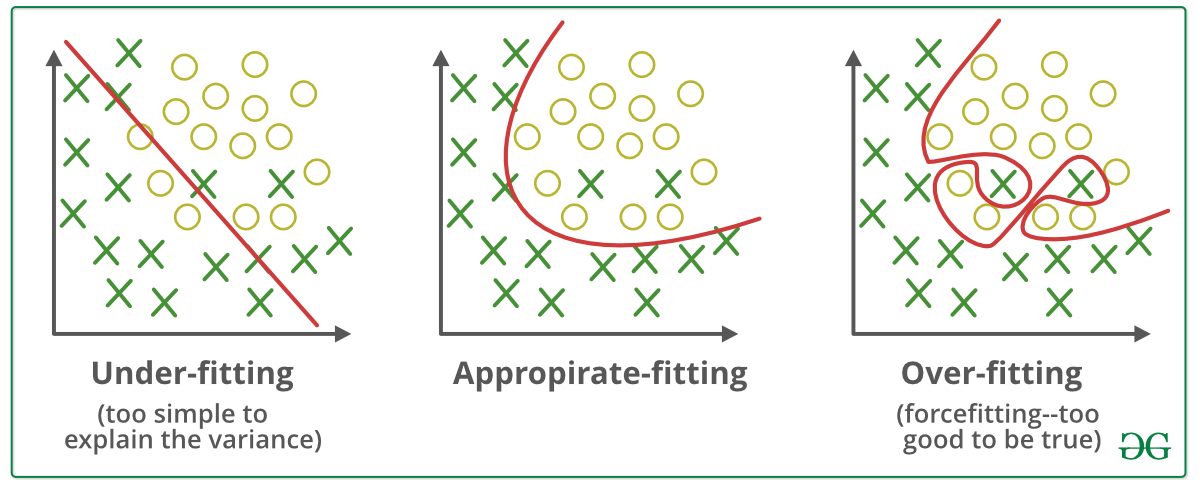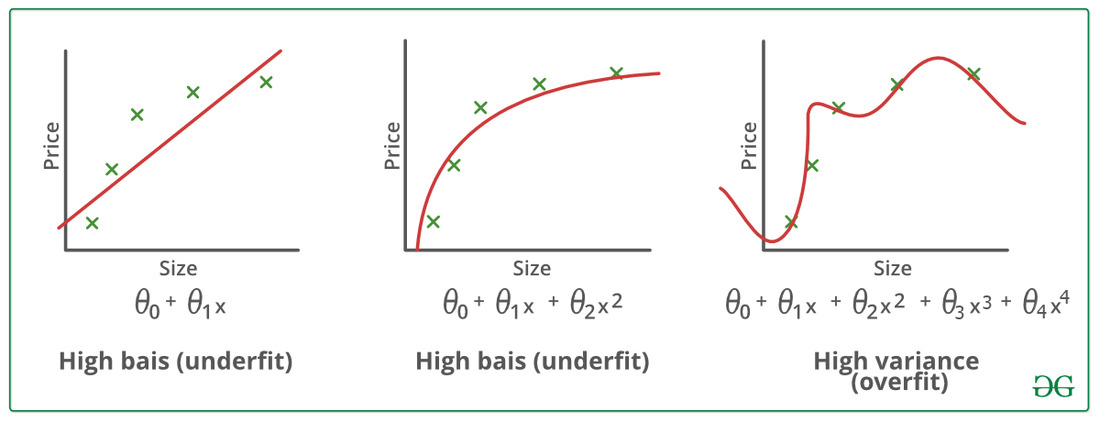

6.	What is the use of batch size and why is it used in Deep Learning?

The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.

A training dataset can be divided into one or more batches.

Why it is used in DL

Since we cannot pass the entire dataset into the neural network at once, we divide the dataset into number of batches or sets or parts. 

When all training samples are used to create one batch, the learning algorithm is called batch gradient descent. When the batch is the size of one sample, the learning algorithm is called stochastic gradient descent. When the batch size is more than one sample and less than the size of the training dataset, the learning algorithm is called mini-batch gradient descent.

* Batch Gradient Descent. Batch Size = Size of Training Set
* Stochastic Gradient Descent. Batch Size = 1
* Mini-Batch Gradient Descent. 1 < Batch Size < Size of Training Set

In the case of mini-batch gradient descent, popular batch sizes include 32, 64, and 128 samples.

7.	Using the above problem statement of Fashion MNIST build a NN with different batch sizes and report the accuracy metrics (acc, val acc, loss, val loss) in a sheet?

(60000, 28, 28) (60000,)
(10000, 28, 28)


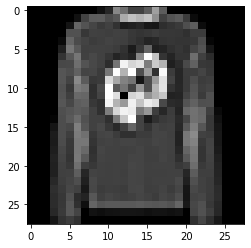

2
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 500)               392500    
                                                                 
 dense_5 (Dense)             (None, 10)                5010      
                                                                 
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.7251 - acc: 0.7695 - val_loss: 0.5451 - val_acc: 0.8178
Epoch 2/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.5091 - acc: 0.8280 - val_loss: 0.4836 - val_acc: 0.8283
Epoch 3/10
1688/1688 [====================

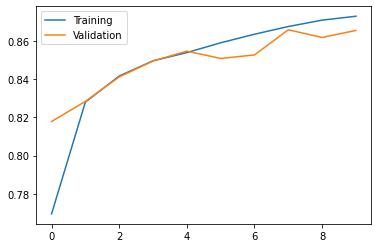

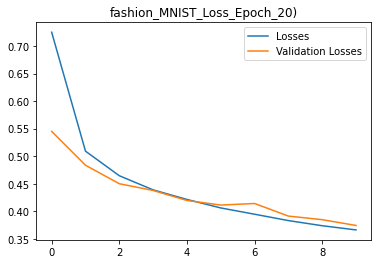

(784, 500)
(500,)
(500, 10)
(10,)
(None, 28, 28) (28, 28)


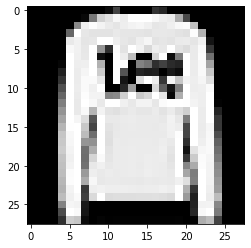

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()
print(x_train.shape,y_train.shape)
print(x_test.shape),(y_test.shape)
plt.imshow(x_train[0,:,:])
plt.imshow(x_train[0,:,:],cmap="gray")

num=123
plt.imshow(x_train[123,:,:],cmap='gray')
plt.show()
print(y_train[num])

#1. Data Processing
x_train=x_train/255.0
y_train=tf.keras.utils.to_categorical(y_train)

#2. Sequential model
model=tf.keras.models.Sequential()

#3. Input layers
model.add(tf.keras.layers.Input(shape=(28,28)))
model.add(tf.keras.layers.Flatten())

#4. HiddenLayers
model.add(tf.keras.layers.Dense(units=500,activation=tf.keras.activations.relu))

#5. Output Layers
model.add(tf.keras.layers.Dense(units=10,activation=tf.keras.activations.softmax))
model.summary()

#6. Feed Forward (Error + Back Propogation)
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),metrics=["acc"])

#7. Run the model
model_history=model.fit(x_train,y_train,epochs=10,validation_split=0.1)

 #8. Visualization
plt.plot(model_history.history.get("acc"),label="Training")
plt.plot(model_history.history.get("val_acc"),label="Validation")
plt.legend()
plt.show()
plt.plot(model_history.history.get("loss"),label="Losses")
plt.plot(model_history.history.get("val_loss"),label="Validation Losses")
plt.legend()
plt.title("fashion_MNIST_Loss_Epoch_20)")
plt.show()

#9. Final Weights
len(model.get_weights())
for i in model.get_weights():
  print(f"{i.shape}")

#10 Test Image
test_image=x_test[1]
plt.imshow(test_image,cmap='gray')
test_image=test_image/255.0
print(model.input.shape, test_image.shape)



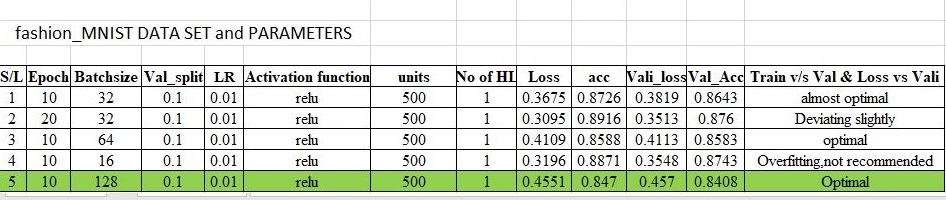